

---


# Panda Mall Prototype

---



*A comparison of several Machine Learning Algorithms to choose the best one for panda Mall recommendation Engine*

**Authors:**

---


1.  Asjad Iftikhar (*18L-0951*)
2.  Tayyab Waseem  (*18L-1017*)
3.  Muhammad Zain  (*18L-1109*)


# Section 1: Preprocessing of the Dataset

---



In [3]:
import pandas as pd
from google.colab import drive
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np

## 1.1 Load **Data**
We load both the csv file containing the test/train data we got from users through **google forms** and the xlsx files containing the product details from brands that we scrapped by using **beautifulSoup4**. 

In [4]:
df_response = pd.read_csv('/content/FYP(Responses).csv')
df_response.head()

,Timestamp,Uniworth (32),Diners (2),TheShop (41),TheShop (21),Diners (8),Diners (10),TheShop (13),Uniworth (34),Uniworth (35),Uniworth (37),Uniworth (39),Uniworth (40),Diners (11),Uniworth (41),TheShop (49),Uniworth (44),TheShop (79),Diners (19),Diners (23),Diners (32),Uniworth (62),Uniworth (66),Diners (37),Diners (40),TheShop (95),Diners (70),Diners (77),Diners (80),TheShop (98),Diners (83),Uniworth (75),Uniworth (90),Uniworth (91),Uniworth (106),Uniworth (107),Uniworth (108),Diners (90),TheShop (140),Diners (100),Diners (105),Uniworth (109),Uniworth (140),Uniworth (143),Uniworth (147),Uniworth (238),Uniworth (262),Diners (126),TheShop (152),Diners (153),Diners (169),Name
0,1/23/2022 11:55:45,4.0,3.0,4.0,5.0,1.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,3.0,2.0,3.0,4.0,2.0,4.0,2.0,3.0,2.0,4.0,2.0,3.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,3.0,Muhammad Ali
1,1/23/2022 13:33:00,3.0,4.0,5.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,Shahroz Ahmad
2,1/23/2022 13:33:34,2.0,3.0,2.0,1.0,3.0,3.0,2.0,4.0,2.0,2.0,1.0,3.0,4.0,2.0,4.0,4.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,4.0,5.0,4.0,2.0,1.0,5.0,5.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,2.0,5.0,1.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,Jehandad Khan
3,1/23/2022 13:35:10,4.0,3.0,2.0,1.0,4.0,4.0,5.0,3.0,3.0,3.0,1.0,3.0,4.0,4.0,2.0,4.0,3.0,2.0,2.0,2.0,4.0,4.0,2.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,3.0,2.0,Cheema
4,1/23/2022 13:35:28,4.0,5.0,4.0,1.0,2.0,1.0,1.0,1.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,4.0,3.0,4.0,1.0,3.0,3.0,2.0,2.0,4.0,2.0,3.0,3.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,1.0,4.0,4.0,2.0,4.0,5.0,2.0,2.0,4.0,3.0,Tayyab


In [5]:
#Read Data from Files
df_diners = pd.read_excel('/content/Diners.xlsx')
df_uniworth = pd.read_excel('/content/Uniworth.xlsx')
df_theshop = pd.read_excel('/content/TheShop.xlsx')

## 1.2 Merge and Clean Data
We merge the data from the brands that we scrapped into one single dataframe. Then we clean data by replacing null values in dataframes.

In [6]:
#Merge Data
allBrands = df_diners.append(df_uniworth)
allBrands = allBrands.append(df_theshop)

In [7]:
#Data Cleaning
df_response.fillna(0.0, inplace = True)

allBrands["Discount"].fillna(0, inplace = True)
allBrands["Original_Rating"].fillna(0, inplace = True)
allBrands.fillna('Not Defined', inplace = True)
allBrands["Collars_Type"].replace(0, "Not Defined", regex=True, inplace = True)

print(len(allBrands))

922


In [8]:
allBrands.head()

,Brand_Name,Product_Title,SKU,Selling_Price,Color_Size,Type,Product_Url,Discount,Fabric,Fit,Original_Rating,Collars_Type,Sleeves,Cuff_Style,Image_Url
0,Diners,Formal Men Shirt,AD25197-BLACK,2952.0,"BLACK,15.5;BLACK,16;",Formal,https://diners.com.pk/collections/shirts/produ...,20.0,Extra Fine Fabric,Regular Fit,0,Classic,Long Sleeves,Not Defined,https://cdn.shopify.com/s/files/1/2219/4051/pr...
1,Diners,Formal Men Shirt in Grey,AM24541-GREY,2632.0,"GREY,14.5;GREY,15.5;GREY,16.5;GREY,17.5;GREY,1...",Not Defined,https://diners.com.pk/collections/shirts/produ...,20.0,Not Defined,Not Defined,0,Not Defined,Not Defined,Not Defined,https://cdn.shopify.com/s/files/1/2219/4051/pr...
2,Diners,Formal Man Shirt in L-Grey,AB23395-L-GREY,2152.0,"L-GREY,15;L-GREY,15.5;L-GREY,16;L-GREY,17.5;L-...",Not Defined,https://diners.com.pk/collections/shirts/produ...,20.0,Not Defined,Not Defined,0,Not Defined,Not Defined,Not Defined,https://cdn.shopify.com/s/files/1/2219/4051/pr...
3,Diners,Formal Man Shirt in Fawn,AB23395-FAWN,2152.0,"FAWN,15;FAWN,16;",Not Defined,https://diners.com.pk/collections/shirts/produ...,20.0,Not Defined,Not Defined,0,Not Defined,Not Defined,Not Defined,https://cdn.shopify.com/s/files/1/2219/4051/pr...
4,Diners,Formal Autograph Shirt,AH22875-L-BLUE,2864.0,"L-BLUE,16;",Formal,https://diners.com.pk/collections/shirts/produ...,20.0,100% Selected Cotton,Modern Fit,0,Classic,Long Sleeves,Not Defined,https://cdn.shopify.com/s/files/1/2219/4051/pr...


## 1.3 Correct Data Format and Remove Duplicates
Corrected any data that was entered in wrong format and then remove any duplicates in the dataframe.

In [9]:
# Data Format
allBrands['Selling_Price'] = pd.to_numeric(allBrands['Selling_Price'], downcast='float')
allBrands['Discount'] = pd.to_numeric(allBrands['Discount'], downcast='float')
# allBrands.head()

In [10]:
# Remove Duplicates
allBrands.drop_duplicates(inplace= True)
df_response.drop_duplicates(inplace= True)
# allBrands.reset_index()
allBrands.head()

,Brand_Name,Product_Title,SKU,Selling_Price,Color_Size,Type,Product_Url,Discount,Fabric,Fit,Original_Rating,Collars_Type,Sleeves,Cuff_Style,Image_Url
0,Diners,Formal Men Shirt,AD25197-BLACK,2952.0,"BLACK,15.5;BLACK,16;",Formal,https://diners.com.pk/collections/shirts/produ...,20.0,Extra Fine Fabric,Regular Fit,0,Classic,Long Sleeves,Not Defined,https://cdn.shopify.com/s/files/1/2219/4051/pr...
1,Diners,Formal Men Shirt in Grey,AM24541-GREY,2632.0,"GREY,14.5;GREY,15.5;GREY,16.5;GREY,17.5;GREY,1...",Not Defined,https://diners.com.pk/collections/shirts/produ...,20.0,Not Defined,Not Defined,0,Not Defined,Not Defined,Not Defined,https://cdn.shopify.com/s/files/1/2219/4051/pr...
2,Diners,Formal Man Shirt in L-Grey,AB23395-L-GREY,2152.0,"L-GREY,15;L-GREY,15.5;L-GREY,16;L-GREY,17.5;L-...",Not Defined,https://diners.com.pk/collections/shirts/produ...,20.0,Not Defined,Not Defined,0,Not Defined,Not Defined,Not Defined,https://cdn.shopify.com/s/files/1/2219/4051/pr...
3,Diners,Formal Man Shirt in Fawn,AB23395-FAWN,2152.0,"FAWN,15;FAWN,16;",Not Defined,https://diners.com.pk/collections/shirts/produ...,20.0,Not Defined,Not Defined,0,Not Defined,Not Defined,Not Defined,https://cdn.shopify.com/s/files/1/2219/4051/pr...
4,Diners,Formal Autograph Shirt,AH22875-L-BLUE,2864.0,"L-BLUE,16;",Formal,https://diners.com.pk/collections/shirts/produ...,20.0,100% Selected Cotton,Modern Fit,0,Classic,Long Sleeves,Not Defined,https://cdn.shopify.com/s/files/1/2219/4051/pr...


## 1.4 Merge User Responses with Product Details
For each product, user pair we make a row in dataframe along with product details.

In [11]:
# get product index in allBrands
def getIndex(brandName):
  if 'Diners' in brandName:
    product = brandName.split(" ")
    ind = int (product[1].translate({ord('('): None}).translate({ord(')'): None})) - 2
  elif 'Uniworth' in brandName: 
    product = brandName.split(" ")
    ind = int (product[1].translate({ord('('): None}).translate({ord(')'): None})) + 257
  elif 'TheShop' in brandName:
    product = brandName.split(" ")
    ind = int (product[1].translate({ord('('): None}).translate({ord(')'): None})) + 744
  else:
    return -1
  return ind

In [12]:
df_response.drop('Timestamp', axis=1, inplace=True)

In [13]:
col = ["Name", "Rating"]
for a in allBrands.columns:
  col.append(a)
print(col)

['Name', 'Rating', 'Brand_Name', 'Product_Title', 'SKU', 'Selling_Price', 'Color_Size', 'Type', 'Product_Url', 'Discount', 'Fabric', 'Fit', 'Original_Rating', 'Collars_Type', 'Sleeves', 'Cuff_Style', 'Image_Url']


In [14]:
# Responses linked with Brands Products (Use this for test/train data)
x = 0
df_data = pd.DataFrame(columns=col)
for i in range(0, len(df_response)):
  name = df_response.iloc[i].Name
  for j in df_response.columns:
    if j != "Name":
      rating = df_response[j].iloc[i]
      ind = getIndex(j)
      details = allBrands.iloc[ind]
      temp = []
      temp.append(name)
      temp.append(str(rating))
      for k in details:
        temp.append(k)
      df_data.loc[x] = temp
      x = x + 1
  
df_data.drop('Product_Url', axis=1, inplace=True)
df_data.drop('SKU', axis=1, inplace=True)
df_data.drop('Image_Url', axis=1, inplace=True)
df_data.drop('Product_Title', axis=1, inplace=True)

# Section 2: Exploratory Data Analysis of Dataset

---



In [15]:
df_data.describe()

,Selling_Price,Discount
count,2350.000000,2350.000000
mean,2768.860000,7.600000
std,778.005354,9.709795
min,1795.000000,0.000000
25%,2128.000000,0.000000
50%,2792.000000,0.000000
75%,3295.000000,20.000000
max,5475.000000,20.000000


In [16]:
save_df = df_data
get_df = df_data.copy()
df_data.head()

,Name,Rating,Brand_Name,Selling_Price,Color_Size,Type,Discount,Fabric,Fit,Original_Rating,Collars_Type,Sleeves,Cuff_Style
0,Muhammad Ali,4.0,Uniworth,2495.0,"Cream,15.5;Cream,16.0;Cream,17.0",Formal Shirt,0.0,65% Cotton 35% Polyester,Regular Fit,0,French Collar,Full Sleeves,Round Cuff
1,Muhammad Ali,3.0,Diners,2952.0,"BLACK,15.5;BLACK,16;",Formal,20.0,Extra Fine Fabric,Regular Fit,0,Classic,Long Sleeves,Not Defined
2,Muhammad Ali,4.0,Marks & Jacobs,1795.0,"Maroon,14.5; Maroon 15.5; Maroon 16.5;",Formal Shirt,0.0,100% Cotton,Slim Fit & Regular Fit,0,Not Defined,Full,Not Defined
3,Muhammad Ali,5.0,Marks & Jacobs,1795.0,"Red ,14.5; Red 15.5; Red 16.5;",Formal Shirt,0.0,100% Cotton,Slim Fit & Regular Fit,0,Not Defined,Full,Not Defined
4,Muhammad Ali,1.0,Diners,2792.0,"PURPLE,14.5;PURPLE,15.5;",Not Defined,20.0,Not Defined,Not Defined,0,Not Defined,Not Defined,Not Defined


In [17]:
print('Number of ratings: %d\nNumber of Products: %d\nNumber of users: %d' % (len(df_data), len(allBrands), len(df_data['Name'].unique())))

Number of ratings: 2350
Number of Products: 922
Number of users: 45


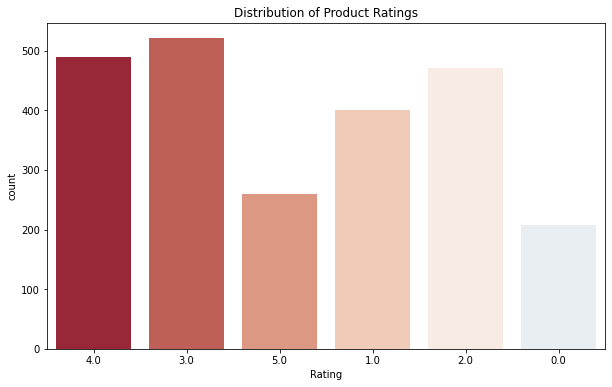

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("RdBu", 10)

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Rating', data=df_data, palette=palette)
ax.set_title('Distribution of Product Ratings')

plt.show()

# Section 3: Implementation of Algorithms
*In this section we will apply the following algorithms on the training the dataset:*


1.   Naive Approach (Control)
2.   Decision Tree
3.   Collaborative Filtering (Model based Approach)
4.   Collaborative Filtering (Memory based Approach)



---



## 3.1 Naive Approach
*Acts as control for experiments:*

Simply Sorts the results based on selling price of each product to generate the prediction

In [19]:
original_df = df_data.sort_values(by=['Rating'])
original_df['id'] = np.arange(len(df_data))%50

n = 50
i = 0
correct = 0
list_df = [original_df[i:i+n] for i in range(0,original_df.shape[0],n)]
for list_ in list_df:
  naive_df = list_.sort_values(by=['Selling_Price'])
  for j in range(n):
    if original_df.iloc[i]['id'] == naive_df.iloc[j]['id']:
      correct += 1
      i += 1

Naive_Accuracy = correct / len(original_df) * 100
print("{:.2f}%".format(Naive_Accuracy))

3.28%


## 3.2  Decision Tree Algorithm
A decision tree is a graphical representation of all possible solutions to a decision based on certain conditions.
On each step or node of a decision tree, used for classification, we try to form a condition on the features to separate all the labels or classes contained in the dataset to the fullest purity.

### 3.2.1 Preprocessing Data
We convert all the entries in each collumn to float type by using fit, transform. Requirement of the algorithm.  

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [21]:
#preprocessing
x = df_data.drop('Rating', axis=1)
enc = preprocessing.OrdinalEncoder()
enc.fit(x[['Name', 'Brand_Name', 'Color_Size', 'Type', 'Fabric', 'Fit', 'Collars_Type', 'Sleeves', 'Cuff_Style']])
x = enc.transform(x[['Name', 'Brand_Name', 'Color_Size', 'Type', 'Fabric', 'Fit', 'Collars_Type', 'Sleeves', 'Cuff_Style']])
df_data['Name'] = x[0:len(x), 0]
df_data['Brand_Name'] = x[0:len(x), 1]
df_data['Color_Size'] = x[0:len(x), 2]
df_data['Type'] = x[0:len(x), 3]
df_data['Fabric'] = x[0:len(x), 4]
df_data['Fit'] = x[0:len(x), 5]
df_data['Collars_Type'] = x[0:len(x), 6]
df_data['Sleeves'] = x[0:len(x), 7]
df_data['Cuff_Style'] = x[0:len(x), 8]

### 3.2.2 Predicting the Ratings
Split the data into test and train. Using DecisionTreeClassifier we train the model on the train data and then we predict the rating based on test data.

In [22]:
# Decision Tree
x = df_data.drop('Rating', axis=1)
y = df_data['Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)
predictions = model_DT.predict(x_test)
for i in range(0, len(predictions)):
  print(str(predictions[i]) + " : " + str(y_test.iloc[i]))

3.0 : 3.0
3.0 : 2.0
0.0 : 0.0
4.0 : 1.0
4.0 : 3.0
4.0 : 4.0
4.0 : 2.0
1.0 : 1.0
5.0 : 5.0
5.0 : 1.0
1.0 : 0.0
3.0 : 4.0
4.0 : 4.0
1.0 : 1.0
1.0 : 1.0
5.0 : 2.0
3.0 : 2.0
4.0 : 1.0
3.0 : 0.0
1.0 : 2.0
2.0 : 0.0
0.0 : 2.0
4.0 : 5.0
4.0 : 1.0
4.0 : 2.0
0.0 : 4.0
5.0 : 4.0
2.0 : 3.0
0.0 : 3.0
3.0 : 3.0
3.0 : 5.0
1.0 : 1.0
4.0 : 3.0
4.0 : 0.0
5.0 : 4.0
2.0 : 3.0
1.0 : 3.0
2.0 : 3.0
2.0 : 4.0
3.0 : 5.0
4.0 : 3.0
5.0 : 2.0
2.0 : 1.0
3.0 : 2.0
4.0 : 2.0
5.0 : 4.0
1.0 : 2.0
0.0 : 0.0
2.0 : 1.0
1.0 : 2.0
0.0 : 0.0
3.0 : 3.0
2.0 : 3.0
3.0 : 0.0
3.0 : 4.0
5.0 : 4.0
3.0 : 5.0
0.0 : 0.0
2.0 : 1.0
2.0 : 4.0
3.0 : 3.0
2.0 : 2.0
0.0 : 2.0
1.0 : 2.0
1.0 : 0.0
0.0 : 0.0
4.0 : 0.0
2.0 : 3.0
1.0 : 1.0
0.0 : 0.0
3.0 : 5.0
2.0 : 2.0
4.0 : 1.0
4.0 : 2.0
1.0 : 1.0
0.0 : 0.0
2.0 : 4.0
0.0 : 2.0
1.0 : 2.0
2.0 : 1.0
4.0 : 4.0
1.0 : 2.0
4.0 : 3.0
3.0 : 2.0
1.0 : 1.0
2.0 : 1.0
4.0 : 2.0
1.0 : 4.0
2.0 : 5.0
0.0 : 0.0
5.0 : 5.0
2.0 : 2.0
5.0 : 4.0
2.0 : 5.0
4.0 : 2.0
1.0 : 3.0
3.0 : 4.0
2.0 : 0.0
3.0 : 4.0
2.0 : 2.0


### 3.2.3 Accuracy

In [23]:
# Decision Tree
Decision_Accuracy = accuracy_score(y_test, predictions)
print("{:.2f}%".format(Decision_Accuracy*100))

30.00%


## 3.3 Model Based Collaborative Filtering Recommender

**Collaborative filtering** is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users. There are two categories of collaborative filtering algorithms: memory based and model based.

**Model based approach** involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.

The goal of this exercise is to use SVD algorithms, try different configurations of parameters and explore obtained results.

In [24]:
!pip install surprise
!pip install functions

     |████████████████████████████████| 11.8 MB 15.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1623245 sha256=e4cae7924d3ca5a515e19fa2b61f5972221f7bf31a511acc53e65fa9e42b1a1c
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise
  Created wheel for functions: filename=functions-0.7.0-py3-none-any.whl size=3061 sha256=13089ad59d4d79dc549112ed47f68937e9b89b2344be0006d18c839a60e363a8
  Stored in directory: /root/.cache/pip/wheels/e4/c6/f4/9b8e9c2c1433f04cc60f3970ec289a258f077b78129f68f3a2
Successfully built functions


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [26]:
save_df['index'] = np.arange(len(save_df))%50
save_df

,Name,Rating,Brand_Name,Selling_Price,Color_Size,Type,Discount,Fabric,Fit,Original_Rating,Collars_Type,Sleeves,Cuff_Style,index
0,20.0,4.0,3.0,2495.0,10.0,2.0,0.0,2.0,4.0,0,3.0,1.0,2.0,0
1,20.0,3.0,1.0,2952.0,1.0,1.0,20.0,7.0,4.0,0,1.0,3.0,1.0,1
2,20.0,4.0,2.0,1795.0,22.0,2.0,0.0,0.0,6.0,0,4.0,0.0,1.0,2
3,20.0,5.0,2.0,1795.0,29.0,2.0,0.0,0.0,6.0,0,4.0,0.0,1.0,3
4,20.0,1.0,1.0,2792.0,25.0,3.0,20.0,8.0,2.0,0,4.0,4.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,43.0,2.0,3.0,3495.0,38.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,45
2346,43.0,2.0,1.0,2792.0,32.0,1.0,20.0,8.0,2.0,0,1.0,3.0,1.0,46
2347,43.0,4.0,2.0,1795.0,24.0,2.0,0.0,0.0,3.0,0,4.0,0.0,1.0,47
2348,43.0,3.0,1.0,2128.0,9.0,1.0,20.0,8.0,4.0,0,1.0,3.0,1.0,48


In [27]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(save_df[['Name', 'index', 'Rating']], reader)
data

In [28]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.264292
test_mae     1.039281
fit_time     0.080824
test_time    0.005057
dtype: float64

### 3.3.1 Optimisation of SVD algorithm

Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.

It is used to find the best setting of parameters:
* n_factors - the number of factors
* n_epochs - the number of iteration of the SGD procedure
* lr_all - the learning rate for all parameters
* reg_all - the regularization term for all parameters

As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [29]:
param_grid = {'n_factors': [80,100,120],
              'n_epochs': [5, 10, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4, 0.6]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.245141535894986
{'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


### 3.3.2 Analysis of Collaborative Filtering model results

In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [30]:
trainset, testset = train_test_split(data, test_size=0.25)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [31]:
df_pred = pd.DataFrame(predictions, columns=['Name', 'index', 'actual_rating', 'pred_rating', 'details'])

df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)

df_pred.sample(5)

,Name,index,actual_rating,pred_rating,pred_rating_round,abs_err
469,42.0,6,5.0,2.421842,2.0,2.578158
273,23.0,32,0.0,1.434627,1.0,1.434627
456,6.0,4,2.0,2.407433,2.0,0.407433
61,2.0,42,3.0,2.304086,2.0,0.695914
351,6.0,2,4.0,2.823276,3.0,1.176724


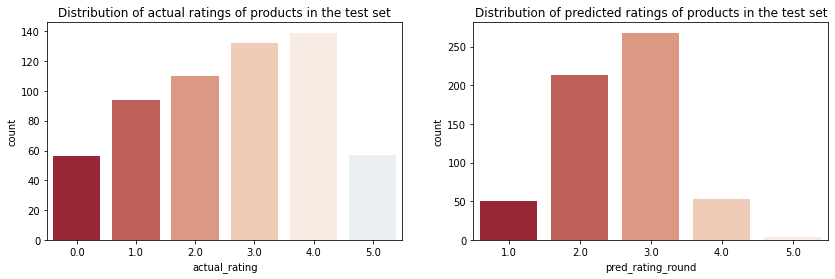

In [32]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of products in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of products in the test set')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


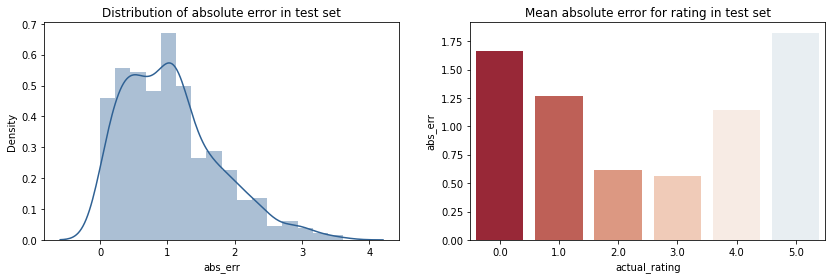

In [33]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

### 3.3.3 Accuracy

In [34]:
total_predictions = len(df_pred)
correct = len(df_pred.loc[df_pred['abs_err'] <= 1])
Model_Accuracy = correct / total_predictions * 100
print("{:.2f}%".format(Model_Accuracy))

51.70%


## 3.4 Memory Based Collaborative Filtering Recommender

**Memory based algorithms** apply statistical techniques to the entire dataset to calculate the predictions. They can be divided into two main sections: user-item filtering and item-item filtering. The closest users or items are calculated only by using Cosine similarity or Pearson correlation coefficients, which are solely based on arithmetic operations.
 The system uses
statistical methods to search for a set of users who have similar
transactions history to the active user. This method is also
called nearest-neighbor or user-based collaborative filtering in nearest neighbor method: (1) choosing other users that are
similar to a user; (2) predicting rating of the item i to a user by
calculating the results of aggregating similar users, and (3)
providing recommendations based on the results.
However,memory-based collaborative filtering has decreasing performance in data with high sparsity and have limited scalability for large datasets


In [35]:
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
import functions as f

In [36]:
product_row_id = []

for row in range(0,len(df_response.Name)):
  for col in df_response.columns:
    if 'Diners' in col or 'Uniworth' in col or 'TheShop' in col:
      product_row_id.append(getIndex(col))

name_unique_id = get_df.assign(id=(get_df['Name']).astype('category').cat.codes)
raw_data = name_unique_id[['id','Rating']]
raw_data['Product_id'] = product_row_id

raw_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,id,Rating,Product_id
0,20,4.0,289
1,20,3.0,0
2,20,4.0,785
3,20,5.0,765
4,20,1.0,6
...,...,...,...
2345,43,2.0,519
2346,43,2.0,124
2347,43,4.0,896
2348,43,3.0,151


In [37]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(raw_data[['id', 'Product_id', 'Rating']], reader)
data

In [38]:
print('Number of ratings: %d\nNumber of Products: %d\nNumber of users: %d' % (len(raw_data), len(raw_data['Product_id'].unique()), len(raw_data['id'].unique())))

Number of ratings: 2350
Number of Products: 50
Number of users: 45


#### 3.4.1 KNN Model Selection
K-Nearest Neighbours algorithm calculates the distances between users or items and finds the closest ones = the most similar ones. Surprise package offers several variations of the model. The comparison of those models shows that KNNBaseline algorithm gives the best performance in terms of RMSE error and is not that time-consuming (compared to other models) when it comes to fitting it.

# KNNBaseline model will be tested in further analysis with different similarity metrics and hyperparameters as well as user-item and item-item approach.

In [39]:
models1 = f.generate_models_dict([KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline], ['msd'], True)
results1 = f.cv_multiple_models(data, models1)
models1 = None
display(results1)


---> CV for KNNBasic msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithMeans msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithZScore msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNBaseline msd...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimat

,fit_time,model,test_mae,test_rmse,test_time
0,0.002358,KNNBasic msd,1.158172,1.382028,0.036411
1,0.002174,KNNWithMeans msd,1.016452,1.239606,0.046501
2,0.005648,KNNWithZScore msd,1.010632,1.236514,0.074717
3,0.003538,KNNBaseline msd,1.042038,1.256181,0.061792


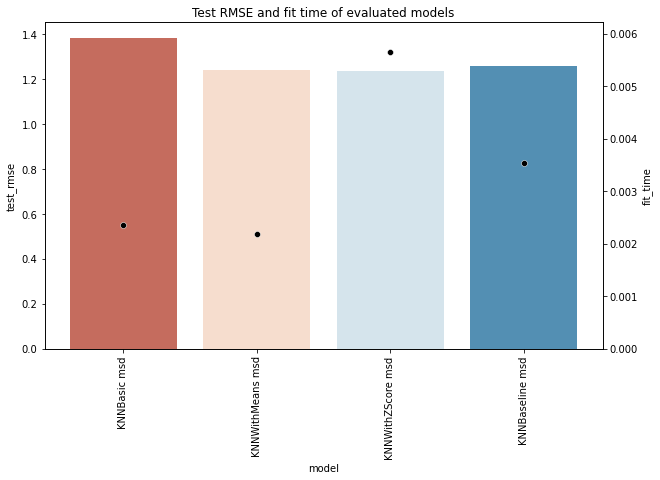

In [40]:
f.draw_model_results(results1)

### 3.4.2 User-Item Model Selection
User-Item approach is to determine a set of the most similar users to the user U (based on their past ratings) and to calculate the rating for the item I based on the ratings assigned by those users.

After conducting the test of different similarity metrics for KNNBaseline (user-item) algorithm, it's clear that Pearson correlation coefficient is the best both in terms of MAE  and less test_time and good fit time as well

In [41]:
models2 = f.generate_models_dict([KNNBaseline], ['cosine', 'msd', 'pearson'], True)
results2 = f.cv_multiple_models(data, models2)
models2 = None
display(results2)


---> CV for KNNBaseline cosine...
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.

---> CV for KNNBaseline msd...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNBaseline pearson...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pea

,fit_time,model,test_mae,test_rmse,test_time
0,0.007257,KNNBaseline cosine,1.050564,1.262641,0.062792
1,0.003929,KNNBaseline msd,1.044292,1.258737,0.060019
2,0.005344,KNNBaseline pearson,1.036883,1.275512,0.049089


### 3.4.3 Item-Item Model Selection
Item-Item approach is to determine a set of the most similar items to the item I (based on the past ratings of other users) and to calculate the rating for the item I based on the ratings of similar items rated by the user U.

As before, Pearson correlation coefficient gives the best results in terms of both RMSE and MAE. By using item-item approach the results of the algorithm were improved compared to the previous iteration.

In [42]:
models3 = f.generate_models_dict([KNNBaseline], ['cosine', 'msd', 'pearson'], False)
results3 = f.cv_multiple_models(data, models3)
models3 = None
display(results3)


---> CV for KNNBaseline cosine...
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.

---> CV for KNNBaseline msd...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNBaseline pearson...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pea

,fit_time,model,test_mae,test_rmse,test_time
0,0.006261,KNNBaseline cosine,1.027138,1.247866,0.073580
1,0.003675,KNNBaseline msd,1.018266,1.241345,0.072171
2,0.006587,KNNBaseline pearson,1.006141,1.231751,0.073026


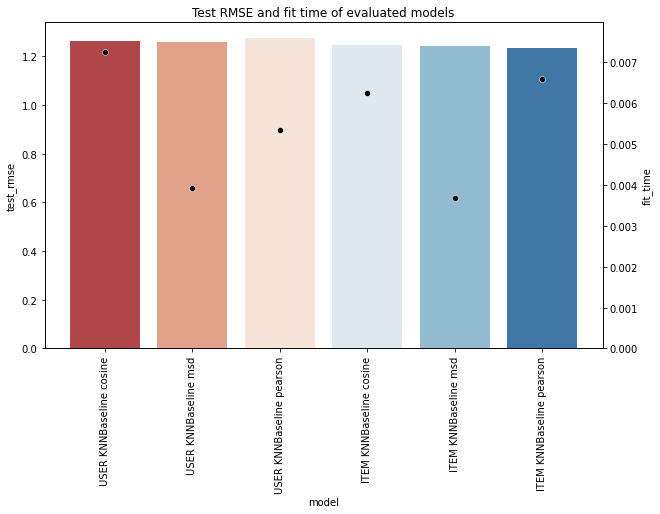

In [43]:
results2['model'] = 'USER ' + results2['model']
results3['model'] = 'ITEM ' + results3['model']

f.draw_model_results(pd.concat([results2, results3]))

### 3.4.4 Memory Based Model Optimisation with GridSearch CV
Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.

Iterating over different sets of parameters of KNNBaseline model shows that increasing k (the max number of neighbours to take into consideration in aggregation) and min_k (the minimum number of neighbors to take into account for aggregation) improves the RMSE score. At the same time, it's good to be aware that increasing those parameters extends the training time and may also lead to overfitting. The best set of parameters (in terms of RMSE) obtained by GridSearch:

KNNBaseline, item-item, Pearson similarity metric

*  k = 30
*  min_k = 5
*  min_support = 1

Optimization of KNNBaseline model may additionally be extended by playing with baseline estimates configuration.

In [44]:
param_grid = {'k': [20,25,30],
              'min_k': [1,3,5],
              'sim_options': {'name': ['pearson'],
                              'min_support': [1, 5],
                              'user_based': [False]}
              }
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als.

### 3.4.5 Analysis of Collaborative Filtering model results
In this part, let's examine in detail the results obtained by the KNN model that provided the best RMSE score.

In [45]:
trainset, testset = train_test_split(data, test_size=0.2)

sim_options = {
    'name': 'pearson',
    'user_based': False,
    'min_support': 1
}

model = KNNWithMeans(k=50, min_k=5, sim_options=sim_options)
model.fit(trainset)
predictions = model.test(testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


Computing the pearson similarity matrix... Done computing similarity matrix.

In [46]:
df_pred = pd.DataFrame(predictions, columns=['id', 'Product_id', 'Rating', 'pred_rating', 'details'])

df_pred['k'] = df_pred['details'].apply(f.k_from_details)
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['Rating'])
df_pred.drop(['details'], axis=1, inplace=True)

df_pred.sample(5)

,id,Product_id,Rating,pred_rating,k,impossible,pred_rating_round,abs_err
209,8,332,0.0,1.659522,30,False,2.0,1.659522
442,34,294,4.0,3.595333,33,False,4.0,0.404667
174,29,519,3.0,3.299417,38,False,3.0,0.299417
51,28,78,5.0,2.459021,34,False,2.0,2.540979
360,0,35,4.0,2.904565,34,False,3.0,1.095435


### 3.4.6 Distribution of actual and predicted ratings in the test set
According to the distribution of actual ratings of Products in the test set, the biggest part of users give medium scores - between 2 and 4. The mode equals 3 but count of ratings 2,4,1 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One more time, 3 is a mode but scores 2,4,1 are clearly less frequent.

It shows that the recommender system is not perfect and it cannot reflect the real distribution of Products ratings.

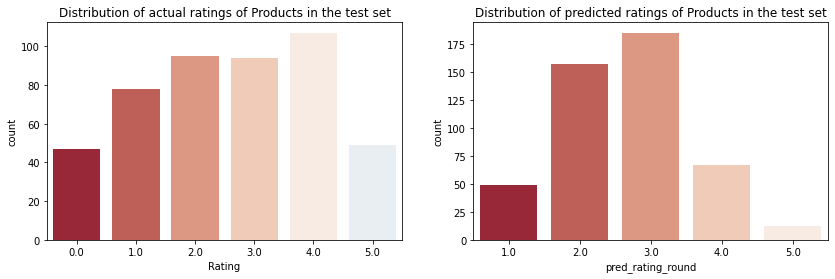

In [47]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='Rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of Products in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of Products in the test set')

plt.show()

### 3.4.7 Absolute error of predicted ratings
The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 4.

How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 3 (the most frequent value). The further the rating from score = 3, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


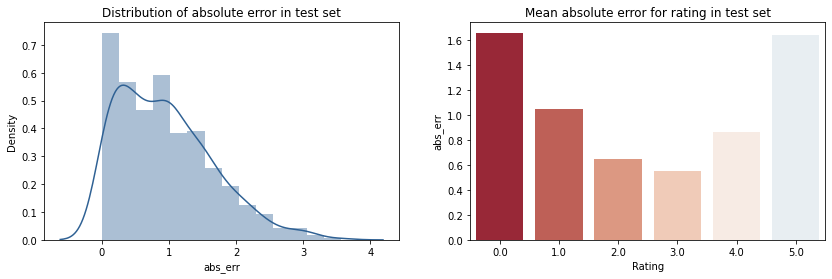

In [48]:
df_pred_err = df_pred.groupby('Rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='Rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

### 3.4.8 Analysis of predicted ratings of a particular user
For this part of the analysis, the user with id 31 was selected. It can be noted that his rating behaviour is slightly different than the behaviour shown in scores' distribution of the whole population. He gives high scores often (4,5,3) and rating = 4,5 is the most frequent value.

The distribution of predicted book ratings for this user differs a little from the actual one. All predicted ratings are between 4-5   and the most frequent rating is 4 (which implies that probably some of the observations with the real score = 4,5 have predicted rating lower than actual).

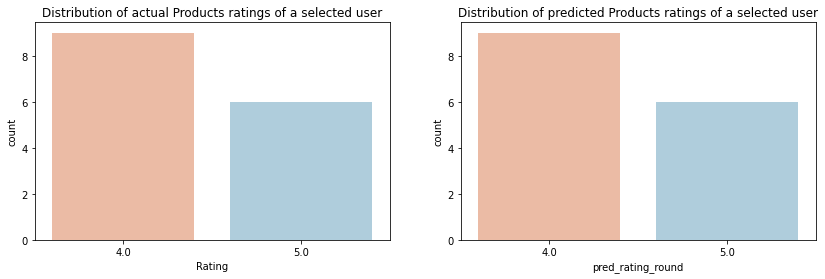

In [49]:
df_pred_user = df_pred[df_pred['id']==31]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='Rating', data=df_pred_user, palette=sns.color_palette("RdBu", len(df_pred_user['Rating'].unique())), ax=ax1)
ax1.set_title('Distribution of actual Products ratings of a selected user')

sns.countplot(x='pred_rating_round', data=df_pred_user, palette=sns.color_palette("RdBu", len(df_pred_user['pred_rating_round'].unique())), ax=ax2)
ax2.set_title('Distribution of predicted Products ratings of a selected user')

plt.show()

In [50]:
total_predictions = len(df_pred)
correct = len(df_pred.loc[df_pred['abs_err'] <= 1])
Model_Accuracy2 = correct / total_predictions * 100
print("{:.2f}%".format(Model_Accuracy2))

59.79%


# Section 4: Conclusion

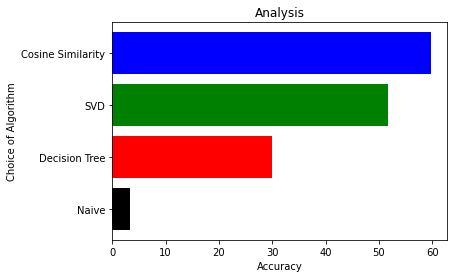

In [51]:
import matplotlib.pyplot as plt

# Algorithms
y=['Naive', 'Decision Tree', 'SVD', 'Cosine Similarity']

# Accuracy
# 40 ko apni value se replace kar dena accuracy ki
x = [Naive_Accuracy, Decision_Accuracy*100, Model_Accuracy, Model_Accuracy2]
plt.barh(y, x, color=['black', 'red', 'green', 'blue', 'cyan'])

# setting label of y-axis
plt.ylabel("Choice of Algorithm")
 
# setting label of x-axis
plt.xlabel("Accuracy")
plt.title("Analysis")
plt.show()



---


In conclusion of these experiments, we can clearly see Collaborative filtering with memory based approach using Cosine Similarity outperforms all other algorithms despite the limitation of data. Therefore, we will use Memory based Colaborative Filtering for the purpose of this project.